In [1]:
"""
K-Mean clustering to solve real world data problem. 

For today’s lecture we will solve customer segmentation problem for marketing campaign.
Data set is publicly available and it has following attributes: 
Think yourself as a marketing manager who has to plan next campaign in a company. Company has
data of 100K customers. It’s not wise to run marketing campaign for all 100K customers at 
least not productive in term of time and money. So, solution to a successful campaign is to 
better understand customers and their behavior. Then select the ones who are best fit into 
the campaign domain or potential buyers. Its easy to group overall customer population of 
100K into smaller clusters using K-Means clustering to understand customers behavior.


For implementation we are using Pandas, Matplotlib and Sklearn libraries in Python. As you 
can see that we imported all necessary files. And used pandas for importing data file. 
"""

In [ ]:
"""
Import all essential libarries that we will use for analysis
"""
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

In [2]:
"""
Load customer data
Make sure that cust_segmentation.csv file is available in project directory. 
"""
import pandas as pd
cust_df = pd.read_csv("Cust_Segmentation.csv")
cust_df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [ ]:
"""
As you can see that data has Customer id, Age, Edu, Years Employed, Income, card debt, Other 
Debt, defaulted, Address and DebtIncomeRation attributes in it. We can build some hypothesis 
based on these attributes using our domain knowledge and metadate.

It is easy to infer that as age increase so does work experience and education, this leads to 
better earnings. Assuming this we can see that these customers can be grouped in different 
clusters and that will be interesting.
"""

In [3]:
"""
Pre-processing
As you can see that other than Address all attributes looks good to be used for 
cluster analysis. We can drop Address form data set.
"""
df = cust_df.drop('Address', axis=1)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [4]:
"""
Normalizing over the standard deviation
Now let's normalize the dataset. But why do we need normalization in the first place? 
Normalization is a statistical method that helps mathematical-based algorithms to interpret 
features with different magnitudes and distributions equally. 
We use standardScaler() to normalize our dataset.
"""
from sklearn.preprocessing import StandardScaler
X = df.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

In [5]:
"""
Modeling
In our example (if we didn't have access to the k-means algorithm), it would be the same as 
guessing that each customer group would have certain age, income, education, etc, with 
multiple tests and experiments. However, using the K-means clustering we can do all this 
process much easier. Lets apply k-means on our dataset, and take look at cluster labels.

We used KMeans available in Sklearn library. 
We used K value equal to 4 and for centroid distribution/initialization we used K-means++. 
N_init=12 tells the algorithm to get executed 12 times and present results undre most optimal.

You can see that against every instance we got cluster number starting from 0 to 3. 
Now it’s easy for us to analyze customers under these clusters for marketing campaign.
"""
clusterNum = 4
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[0 1 3 0 2 3 3 3 0 1 3 0 0 0 0 0 0 0 3 0 0 0 0 3 1 3 0 0 3 0 1 3 0 0 0 0 0
 0 0 1 0 1 0 1 0 3 0 0 0 3 3 0 0 3 3 0 0 0 3 0 3 0 3 3 0 0 3 0 0 0 3 3 1 0
 0 0 3 0 1 3 3 3 1 0 3 0 0 0 0 0 3 0 0 0 0 3 0 0 0 0 0 1 3 3 0 3 0 0 3 3 3
 0 0 0 0 0 0 3 3 0 0 0 0 3 0 3 0 0 0 0 0 3 0 0 0 0 3 0 0 0 0 0 0 0 3 0 3 0
 0 0 0 0 0 0 3 0 1 1 0 3 0 0 3 3 0 0 3 0 0 3 3 0 0 0 0 0 3 0 0 3 3 0 0 1 0
 0 0 0 0 3 0 0 3 0 3 0 0 3 2 0 1 0 0 0 0 3 0 2 1 0 0 3 3 3 0 0 3 3 3 3 0 1
 0 0 0 0 1 0 0 3 0 0 3 0 3 0 0 0 3 0 0 0 0 0 0 1 3 3 0 0 0 0 0 0 3 0 0 0 0
 0 0 3 3 3 3 0 0 3 0 0 0 0 0 3 0 0 0 3 0 0 0 1 1 0 1 0 3 0 1 3 0 0 0 0 0 0
 0 0 0 3 3 3 0 0 0 3 3 0 0 0 3 0 0 0 3 0 0 0 0 0 3 0 1 0 0 3 0 0 1 3 3 1 0
 0 3 0 0 3 0 3 0 3 0 0 3 0 0 3 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 3 0 3 1 1 3
 0 0 3 0 0 0 0 0 0 0 0 0 0 0 1 0 3 0 0 0 0 3 0 0 0 0 0 1 0 0 0 0 0 0 0 3 0
 3 1 0 0 3 0 0 0 0 3 0 3 0 3 3 0 0 3 0 0 0 0 0 3 0 0 0 3 0 0 0 3 3 3 0 0 2
 3 0 3 3 3 0 3 0 0 0 1 0 0 0 0 3 0 1 0 0 0 0 3 0 3 3 3 0 3 1 3 0 3 0 0 0 3
 0 3 0 0 0 0 1 0 0 0 3 0 

In [6]:
"""
Let’s have an insight of our clusters. First, we can assign the cluster labels to our 
instances in original data frame. We added a new attribute Clus_km as label against 
every instance in original data frame.
"""
df["Clus_km"] = labels
df.head(5)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Clus_km
0,1,41,2,6,19,0.124,1.073,0.0,6.3,0
1,2,47,1,26,100,4.582,8.218,0.0,12.8,1
2,3,33,2,10,57,6.111,5.802,1.0,20.9,3
3,4,29,2,4,19,0.681,0.516,0.0,6.3,0
4,5,47,1,31,253,9.308,8.908,0.0,7.2,2


In [7]:
"""
Next, we can group instances under their respective cluster and check the centroid values 
by averaging the features in each cluster.
"""
df.groupby('Clus_km').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Clus_km,,,,,,,,,
0,433.908602,32.037634,1.611111,5.451613,28.016129,0.924932,1.894054,0.295259,10.112366
1,397.901639,43.442623,2.196721,19.245902,122.918033,3.832984,7.322721,0.127660,9.060656
2,453.500000,46.600000,2.300000,21.200000,270.900000,7.884000,13.375200,0.428571,8.210000
3,410.619910,39.737557,1.800905,12.909502,62.597285,2.314629,4.432747,0.203297,10.716742


In [ ]:
"""
Above summary itself tells the story of resultant clusters. 
Where cluster 0 has all customers, who are youngest among population with lesser experience, 
lesser education hence lesser salary.

While Cluster 1 and 2 are cluster of middle-aged people with two variations. 
Where cluster 1 is lower-end middle-aged people with second lowest education, experience and 
result into lesser salary. 

While cluster 2 has instance of high-end middle-aged people with relatively high education. 
Higher experience and higher salary. 

Cluster 3 has instances of old people with highest education, experience and salary.
"""

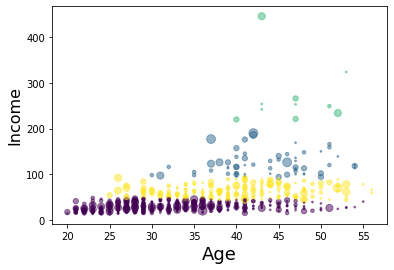

In [8]:
"""
We can see the clusters in 2-D space under two powerful influencers on cluster extraction 
process i.e., Age and Income. 
"""
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)
plt.show()

In [ ]:
"""
This verifies the idea we draw in previous slide i.e., 
cluster 0 has all customers who are youngest among population with lesser experience, 
lesser education hence lesser salary.

While Cluster 1 and 2 are cluster of middle-aged people with two variations. 

Where cluster 1 is lower-end middle-aged people with second lowest education, experience and 
result into lesser salary. 

While cluster 2 has instance of high-end middle-aged people with relatively high education. 
Higher experience and higher salary. 

Cluster 3 has instances of old people with highest education, experience and salary.

Now it’s easy for us to plan our marketing campaigns accordingly. Maybe we will plan 
4 different marketing campaigns to offer services and product for four different groups 
of customers. It will be much more effective to run 4 marketing campaigns compare to 
generic one. 

"""

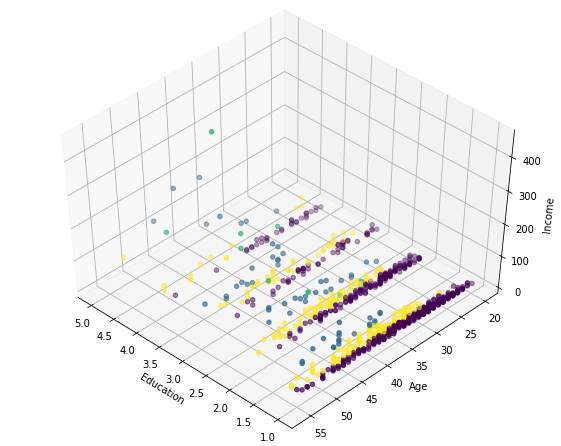

In [9]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

ax.scatter(X[:, 1], X[:, 0], X[:, 3], c= labels.astype(np.float))

Text(0, 0.5, 'Inertia')

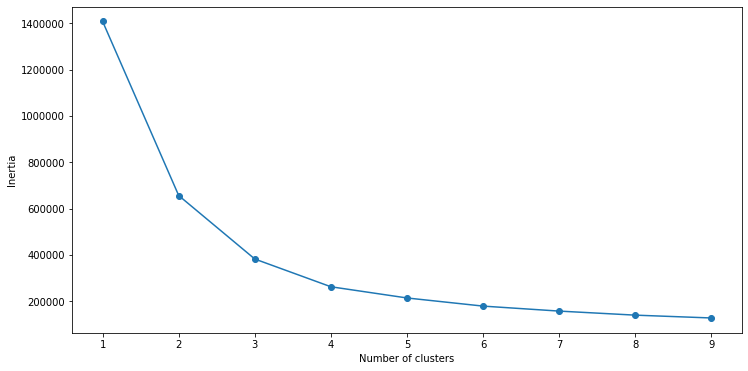

In [10]:
'''
Elbow method 
Now let’s use Elbow method to determine if K value of 4 was good for our cluster analysis 
or not. Elbow method basically depends on distortion rate over different values of K. 

We can iterate the values of k from 1 to 9 and calculate the values of distortions for each 
value of k in the given range. Here we used kmeans.inertia_ to get sum of squared error rate 
or inertia for distortion over different values of k.
'''
SSE = []
for cluster in range(1,10):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(X)
    SSE.append(kmeans.inertia_)

"""
Converting the results into a dataframe and plotting them
After getting distortion values against each k we saved these into a dataframe “frame”.
"""
frame = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})
plt.figure(figsize=(12,6))

"""
Now we have k values and their distortion rate in frame. 
We can visualize distortion rate change over different k value using simple line graph. 
Let’s draw line graph using matplotlib.
"""
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [ ]:
"""
As you can see the line graph looks like an elbow with a joint. There is significant drop in 
inertia from k value 1 to 4. While from k value 4 onward there is minor change in distortion. 
So, we can easily say that k=4 is joint in elbow, which means choice of k=4 seems best in our
case.
"""

In [11]:
'''
Lets use elbow method to see suitable K value
We need to define the following:-

Distortion: It is calculated as the average of the squared distances from the cluster centers 
of the respective clusters. Typically, the Euclidean distance metric is used.
Inertia: It is the sum of squared distances of samples to their closest cluster center.
We iterate the values of k from 1 to 9 and calculate the values of distortions for each value 
of k and calculate the distortion and inertia for each value of k in the given range.
'''
from sklearn import metrics 
from scipy.spatial.distance import cdist 
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(X) 
    kmeanModel.fit(X)     
      
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / X.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / X.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 

In [12]:
#Lets visualize distortion over different k values
for key,val in mapping1.items(): 
    print(str(key)+' : '+str(val)) 

1 : 28.63786394389046
2 : 21.46176626061437
3 : 17.471452837382014
4 : 14.978376698124027
5 : 13.313885385519463
6 : 12.851620856999288
7 : 12.280038447325445
8 : 11.489913092118348
9 : 10.978955330218673


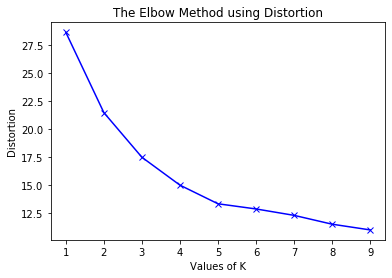

In [13]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show()

In [ ]:
"""
Today we learnt about clustering in general and discussed K-Means clustering in specific. 
We learnt how K-Means clustering works, K-Means algorithm, different distance metrices used 
in K-Means clustering, challenges in K-Means clustering. We also solved real world data 
problem using K-Means clustering using Python libraries.
"""